<a href="https://colab.research.google.com/github/AmrMahmoud12/Captcha-Recognition-using-Artificial-Intelligence/blob/master/captcha_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import cv2
import pickle
import os.path
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.2.0-rc2'

In [5]:
model = tf.keras.models.load_model('/content/model.hdf5')


In [9]:
letters = "0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z aa bb dd ee ff gg hh nn qq rr tt"

index_to_leter = dict(zip(list(range(0,len(letters)+2)), letters.split(" ") ))

print(len(index_to_leter))

47


In [10]:
import os
arr = os.listdir("/content/captcha_test")
image_paths = [ os.path.join("/content/captcha_test",x) for x in arr]
print(image_paths)

['/content/captcha_test/YE9F.jpg', '/content/captcha_test/ZF3D.jpg', '/content/captcha_test/YV92.jpg', '/content/captcha_test/YHH8V.jpg', '/content/captcha_test/YEG7.jpg', '/content/captcha_test/ZJZF.jpg', '/content/captcha_test/YVDE.jpg', '/content/captcha_test/YFNZ.jpg', '/content/captcha_test/XR7R.jpg', '/content/captcha_test/YNM5M.jpg', '/content/captcha_test/YRPSG.jpg', '/content/captcha_test/YFVEN.jpg', '/content/captcha_test/YK7Z.jpg', '/content/captcha_test/ZJ9S.jpg', '/content/captcha_test/XV2WN.jpg', '/content/captcha_test/ZMA57.jpg', '/content/captcha_test/XVM4T.jpg', '/content/captcha_test/ZMBWX.jpg']


['Y', 'Q', 'F']
CAPTCHA text is: YQF


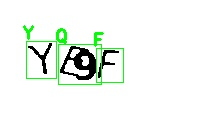

['Z', 'F', '3', 'D']
CAPTCHA text is: ZF3D


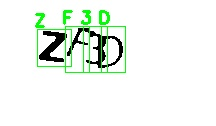

['W', 'g', '2']
CAPTCHA text is: Wg2


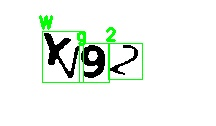

31
['M', 'H', '8', 'V']
CAPTCHA text is: MH8V


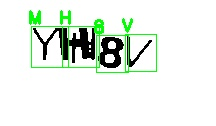

['M', 'E', 'G', '7']
CAPTCHA text is: MEG7


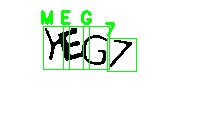

['g', 'Z', 'F']
CAPTCHA text is: gZF


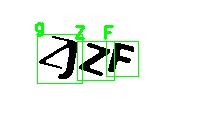

['X', 'W', 'E']
CAPTCHA text is: XWE


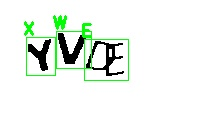

['H']
CAPTCHA text is: H


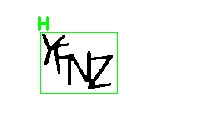

['X', 'R', 'R']
CAPTCHA text is: XRR


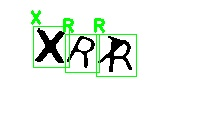

['X', 'N', 'M', '5', 'M']
CAPTCHA text is: XNM5M


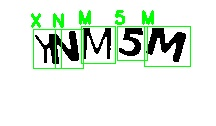

['Y', 'A', 'P', 'A', 'G']
CAPTCHA text is: YAPAG


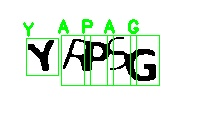

['X', 'G', 'N']
CAPTCHA text is: XGN


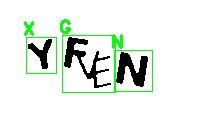

['Y', 'K', 'Z', 'Z']
CAPTCHA text is: YKZZ


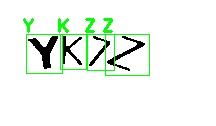

25
['Z', 'J', 'g', '5']
CAPTCHA text is: ZJg5


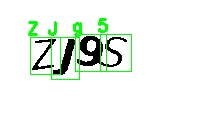

['W', 'Z', 'W', 'N']
CAPTCHA text is: WZWN


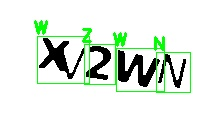

19
33
['Z', 'M', 'A', 'B', '7']
CAPTCHA text is: ZMAB7


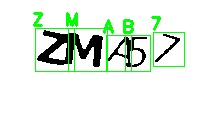

['X', 'W', 'M', 'T']
CAPTCHA text is: XWMT


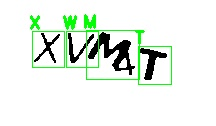

['Z', 'M', 'A', 'N', 'X']
CAPTCHA text is: ZMANX


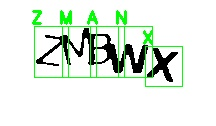

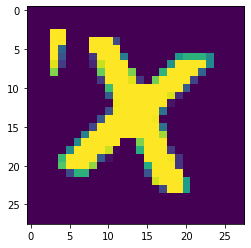

In [13]:
for i in image_paths:    
    img = cv2.imread(i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # img = cv2.medianBlur(img, 1)
    img = cv2.GaussianBlur(img , (25, 25), 1)

    #thresholding to remove background
    thr = cv2.threshold(img, 0, 255,  cv2.THRESH_OTSU)[1]
    #control kernel
    kernel = np.ones((3,3), np.uint8)
    img=cv2.dilate(thr,kernel)

    kernel = np.ones((3, 3), np.uint8)
    img = cv2.erode(img, kernel)

    kernel=np.ones((2,2),np.uint8)
    img=cv2.dilate(img,kernel)
    #add border arround the image to prevent loss of information
    img = cv2.copyMakeBorder(img, 28, 28, 28, 28, cv2.BORDER_CONSTANT, value=255)
    # img = cv2.Canny(img, 30, 30)


    #invert the image if you not invert them will detect outer contour
    img = cv2.bitwise_not(img)

    contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    len(contours)
#     imgplot = plt.imshow(img,cmap='gray')        
#     plt.show()

    #make a new list for the targeted contours
    newContours=[]#for the specified shapes only , no outer image nor inner of items
    xs=[]
    ys=[]
    ws=[]
    hs=[]
    WdevH=[]
    a=[]
    letter_image_regions=[]

    #loop over zip of contours and hierarchy so to get matched cuples of contours and hierarchs
    for contour,hierarch in zip(contours,hierarchy[0]):#it is dimensional
        if hierarch[3] == -1:#get the parent only which is the last of the last of each list
            newContours.append(contour)
        else:
            continue

    lenghtContours=len(newContours)

    for contour in newContours:
        area = cv2.contourArea(contour)
        a.append(area)
        if area > 50:
            a.append(area)
            # Get the rectangle that contains the contour
            x, y, w, h = cv2.boundingRect(contour) 
        #     xs.append(x) 
        #     ys.append(y)
        #     ws.append(w)
        #     hs.append(h)
        #     WdevH.append(wdevh)
            if  lenghtContours==5:
                roi = img[y:y+h, x:x+w]
#                 cv2.imwrite("{}.png".format(str(w/h)), roi)
                letter_image_regions.append((x,y,w,h))
            elif  lenghtContours==4:
                if w/h >=1.2:
                        half_width = int(w / 2)
                        letter_image_regions.append((x, y, half_width, h))
                        letter_image_regions.append((x + half_width, y, half_width, h))
                else:
                        # This is a normal letter by itself
                        letter_image_regions.append((x, y, w, h))

            elif lenghtContours==1:
                if w/h >=2 and w/h <=4 :
                        one_item=int(w/4)
                        letter_image_regions.append((x,y,one_item,h))
                        letter_image_regions.append((x+one_item,y,one_item,h))
                        letter_image_regions.append((x+(2*one_item),y,one_item,h))
                        letter_image_regions.append((x+(3*one_item),y,one_item,h))
                elif w/h > 4 :
                        one_item_from5=int(w/5)
                        letter_image_regions.append((x,y,one_item_from5,h))
                        letter_image_regions.append((x+one_item_from5,y,one_item_from5,h))
                        letter_image_regions.append((x+(2*one_item_from5),y,one_item_from5,h))
                        letter_image_regions.append((x+(3*one_item_from5),y,one_item_from5,h))
                        letter_image_regions.append((x+(4*one_item_from5),y,one_item_from5,h))
                else:
                        letter_image_regions.append((x,y,w,h))
            elif lenghtContours==3:
                if w/h >= 1.2 and w/h <= 2.1  :
                        half_width = int(w / 2)
                        print(half_width)
                        letter_image_regions.append((x, y, half_width, h))
                        letter_image_regions.append((x + half_width, y, half_width, h))
                elif w/h > 2.1:
                        one_item_from3 = int(w/3)
                        letter_image_regions.append((x,y,one_item_from3,h))
                        letter_image_regions.append((x+one_item_from3,y,one_item_from3,h))
                        letter_image_regions.append((x+(2*one_item_from3),y,one_item_from3,h))

                else:
                        letter_image_regions.append((x,y,w,h))
            elif lenghtContours==2:

                if w/h > 1.2 and w/h <= 2:
                        one_item_from3=int(w/3)
                        letter_image_regions.append((x,y,one_item_from3,h))
                        letter_image_regions.append((x+one_item_from3,y,one_item_from3,h))
                        letter_image_regions.append((x+(2*one_item_from3),y,one_item_from3,h))   
                elif w/h >2:
                        one_item=int(w/4)
                        letter_image_regions.append((x,y,one_item,h))
                        letter_image_regions.append((x+one_item,y,one_item,h))
                        letter_image_regions.append((x+(2*one_item),y,one_item,h))
                        letter_image_regions.append((x+(3*one_item),y,one_item,h))
                else:
                        letter_image_regions.append((x,y,w,h))   
        else:
            continue



    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

    img= cv2.subtract(255, img)#reverse color again 
    # Create an output image and a list to hold our predicted letters
    output = cv2.merge([img] * 3)
    predictions = []    
    # cv2.imwrite('x.png', output)

    for i in letter_image_regions:
        x,y,w,h = i
        roi = img[y:y+h, x:x+w]
    #     print(roi)
        #add border arround the image to prevent loss of information
    #     img = cv2.copyMakeBorder(roi, 8, 8, 8, 8, cv2.BORDER_CONSTANT, value=255)
    #     #     print(roi)
    #     cv2.imwrite("{}.png".format(str(x)), roi)////
    #         print('I am 4')
    #         print(x)
    #         # Compare the width and height of the contour to detect letters that
    #         # are conjoined into one chunk


    # loop over the letters
    for letter_bounding_box in letter_image_regions:
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box
    #     print(x,y,w,h)
         # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = img[y - 2:y + h + 2, x - 2:x + w + 2]
        letter_image = cv2.copyMakeBorder(letter_image, 5, 5,5 , 5, cv2.BORDER_CONSTANT, value=255)


        # Re-size the letter image to 20x20 pixels to match training data
        # Re-size the letter image to 20x20 pixels to match training data
  
        letter_image = cv2.resize(letter_image,(28,28))  

        letter_image= cv2.subtract(255, letter_image)#reverse color again 
        letter_image = letter_image /255.0

        plt.imshow(letter_image)

        # Turn the single image into a 4d list of images to make Keras happy
        letter_image = np.expand_dims(letter_image, axis=2)
        letter_image = np.expand_dims(letter_image, axis=0)
         # Ask the neural network to make a prediction
           

        prediction = model.predict(letter_image)
        # Convert the one-hot-encoded prediction back to a normal letter
        letter = index_to_leter[prediction.argmax()]
        if len(letter) == 2:
          letter = letter[0]
        predictions.append(letter)
        # draw the prediction on the output image
        cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (0, 255, 0), 1)
        cv2.putText(output, letter, (x - 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)

    # Print the captcha's text  
    print(predictions) 
    captcha_text = "".join(predictions)
    print("CAPTCHA text is: {}".format(captcha_text))
    cv2.imwrite('workaround.jpg',output)
    from IPython.display import Image
    display(Image(filename='workaround.jpg'))
# Show the annotated image
# cv2.imshow("Output", output)
# cv2.waitKey()    
#invert the image if you not invert them will detect outer contour
#     img = cv2.bitwise_not(img)
#     cv2.imwrite("{}.png".format(str(x)), letter_image)